## 개념

**(1) KNN 분류**

**(2) KNN 회귀**

## scikit-learn의 KNeighborsClassifier

In [1]:
import pandas as pd

liver = pd.read_csv('../../dataset/indian_liver_patient.csv')

print(liver.Dataset.unique())
liver.head()

[1 2]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
import numpy as np

liver.Gender = np.where(liver.Gender == 'Female', 0, 1)
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [4]:
liver.dropna(axis=0, inplace=True)
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(405, 10) (174, 10) (405,) (174,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=15)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print(f'정확도\t{round(test_acc*100,2)}')
print(f'정밀도\t{round(test_prc*100,2)}')
print(f'재현율\t{round(test_rcll*100,2)}')
print(f'F1\t{round(test_f1*100,2)}')

[[106  18]
 [ 39  11]]


정확도	67.24
정밀도	73.1
재현율	85.48
F1	78.81


## scikit-learn의 KNeighborsRegressor

In [8]:
import numpy as np

# 임의의 샘플데이터 생성하기
np.random.seed(0)
X = np.sort(5 * np.random.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

print(X[:10])
print(T[:10])
print(y[:10])

[[0.02347738]
 [0.05713729]
 [0.05857042]
 [0.06618429]
 [0.08164251]
 [0.08214815]
 [0.09260897]
 [0.093949  ]
 [0.09596599]
 [0.10053773]]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]
 [0.0501002 ]
 [0.06012024]
 [0.07014028]
 [0.08016032]
 [0.09018036]]
[0.02347522 0.05710621 0.05853694 0.06613598 0.08155185 0.08205579
 0.09247665 0.09381086 0.09581876 0.10036845]


In [9]:
# 타깃데이터에 노이즈 추가하기
y[::1] += 1 * (0.5 - np.random.rand(400))
print(y[:10])

[ 0.12221572 -0.37218521  0.45892201 -0.37916555 -0.28793668  0.12789339
  0.26577577  0.36106673 -0.01864595  0.56729386]


In [10]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(train_X, train_y)
knn_dis.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [12]:
uni_pred = knn_uni.predict(test_X)
dis_pred = knn_dis.predict(test_X)

from sklearn.metrics import mean_squared_error, mean_absolute_error

import pandas as pd
import numpy as np

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=weights, columns=evls)

for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['mae'] = round(mae, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)
    
results

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


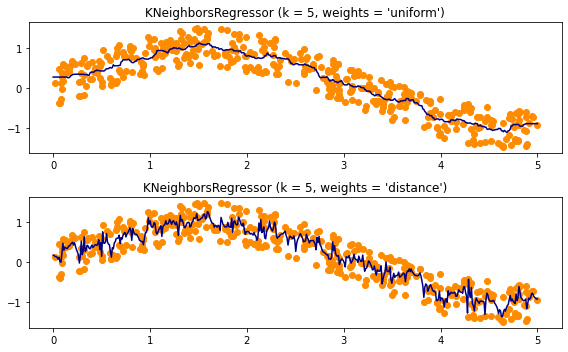

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for i, weights in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2, 1, i+1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt. plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.title(f"KNeighborsRegressor (k = {5}, weights = '{weights}')")
    
plt.tight_layout()
plt.show()